# Task - 2 Beginner Level Task

# Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df1=df.reset_index()['Close']

In [5]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

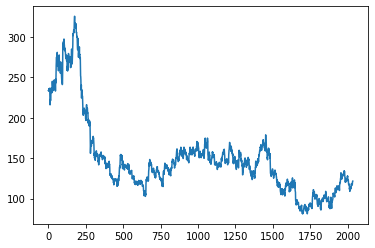

In [6]:
plt.plot(df1)

LSTM is very sensitive to the scale of the data, Here the scale of the Close value is in a kind of scale, we should always try to transform the value.

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [9]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(1322, 713)

Create dataset

In [11]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [13]:
print(x_train.shape,y_train.shape)

(1221, 100) (1221,)


In [14]:
print(x_test.shape,y_test.shape)

(612, 100) (612,)


While Implementing any LSTM, we should always reshape our X train in 3-D, add 1 the reason behind is the time step and the 1 is given to the LSTM.

In [15]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [16]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
20/20 [==============================] - 11s 316ms/step - loss: 0.0288 - val_loss: 0.0029
Epoch 2/100
20/20 [==============================] - 5s 262ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 3/100
20/20 [==============================] - 5s 226ms/step - loss: 0.0018 - val_loss: 9.4434e-04
Epoch 4/100
20/20 [==============================] - 6s 280ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 5/100
20/20 [==============================] - 5s 279ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 7s 333ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7/100
20/20 [==============================] - 6s 289ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/100
20/20 [==============================] - 5s 253ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/100
20/20 [==============================] - 6s 299ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 10/100
20/20 [==============================] - 7s 340ms/step - loss: 0.0014 - v

20/20 [==============================] - 6s 320ms/step - loss: 3.7908e-04 - val_loss: 2.9480e-04
Epoch 77/100
20/20 [==============================] - 6s 275ms/step - loss: 3.3541e-04 - val_loss: 2.8556e-04
Epoch 78/100
20/20 [==============================] - 6s 321ms/step - loss: 3.2775e-04 - val_loss: 3.1820e-04
Epoch 79/100
20/20 [==============================] - 6s 286ms/step - loss: 3.8424e-04 - val_loss: 3.2616e-04
Epoch 80/100
20/20 [==============================] - 6s 288ms/step - loss: 3.2041e-04 - val_loss: 3.0752e-04
Epoch 81/100
20/20 [==============================] - 4s 227ms/step - loss: 3.1033e-04 - val_loss: 2.8053e-04
Epoch 82/100
20/20 [==============================] - 6s 305ms/step - loss: 3.4100e-04 - val_loss: 3.7991e-04
Epoch 83/100
20/20 [==============================] - 4s 195ms/step - loss: 2.9108e-04 - val_loss: 3.9039e-04
Epoch 84/100
20/20 [==============================] - 5s 272ms/step - loss: 3.5131e-04 - val_loss: 2.8199e-04
Epoch 85/100
20/20 [===

In [19]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [20]:
math.sqrt(mean_squared_error(y_train,train_predict))

166.54961859736977

In [21]:
math.sqrt(mean_squared_error(y_test,test_predict))

115.99587044711835

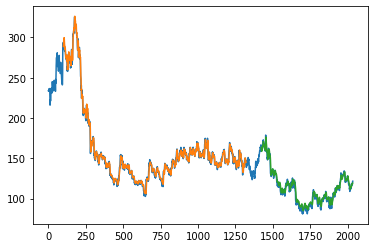

In [22]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()